Within-talkpage-network is modeled as a directed graph.

In [118]:
# define functions to work with graph
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


def extractTime(line, delim):
    v = line.split(delim)
    return v[2]
    
def createGraph(pathtographfile, delim):
    f = open(pathtographfile, 'r')
    edge_to_weight = {}
    count = 0
    firstDate = None
    for line in f:
        key = line.rstrip()
        if count == 0:
            firstDate = extractTime(key,delim)
            count += 1
        if key in edge_to_weight:
            edge_to_weight[key] += 1
        else:
            edge_to_weight[key] = 1
    G = nx.DiGraph(firstDate=firstDate)
    for (e,w) in edge_to_weight.items():
        v = e.split(delim)
        G.add_edge(v[0], v[1], weight=w, time=v[2])
    return G

def computeAndPlotDegreeStats(G):
    in_degrees = []
    count = 0
    for indeg in G.in_degree_iter():
        in_degrees.append(indeg[1])
        if (indeg[1] >= 1):
            count += 1
        

    print("mean in-degree", np.mean(in_degrees), "sd = ", np.std(in_degrees))
    print ("max in-degree = ", np.max(in_degrees))
    print("w. in-degree >= 1 = ", count)

    out_degrees = []
    count = 0
    for outdeg in G.out_degree_iter():
        out_degrees.append(outdeg[1])
        if (outdeg[1] >= 1):
            count += 1
    print("mean out-degree", np.mean(out_degrees), " sd =", np.std(out_degrees))
    print ("max out-degree = ", np.max(out_degrees))
    print("w. out-degree >= 1 = ", count)
   
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(12,6))
    idplot = fig.add_subplot(121)
    idplot.hist(in_degrees, bins=50)
    idplot.set_title("in-degree distribution")
    odplot = fig.add_subplot(122)
    odplot.hist(out_degrees, bins=50)
    odplot.set_title("out-degree distribution")
    plt.show()
    
    
def boxPlotDegreeDist(G):
    in_degrees = []
    for indeg in G.in_degree_iter():
        in_degrees.append(indeg[1])
    print("Avg. indegree ", np.mean(in_degrees))
    print("Std. indegree ", np.std(in_degrees))
    out_degrees = []
    for outdeg in G.out_degree_iter():
        out_degrees.append(outdeg[1])
    print("Avg. outdegree", np.mean(out_degrees))
    print("Std. outdegree", np.std(out_degrees))
    data = [in_degrees, out_degrees]
    plt.figure()
    plt.boxplot(data, labels=["in-degree", "out-degree"])
    plt.savefig("/Users/totucuong-standard/Projects/wikisocial-paper/images/boxplot_degree")
    plt.show()
    
#     fig2 = plt.figure(figsize=(12,6))
#     indegbox = fig2.add_subplot(121)
#     indegbox.set_title("in-degree")
#     indegbox.boxplot(in_degrees)
#     outdegbox = fig2.add_subplot(122)
#     outdegbox.set_title("out-degree")
#     outdegbox.boxplot(out_degrees)
#     plt.show()


def drawGraph(G, name):
    nx.draw(G, node_size=10)
    plt.savefig(name)
    plt.show()
    
def analyzeComponents(G):
    UG = G.to_undirected()
    largest_cc = max(nx.connected_components(UG), key=len)
    print("number of components:", nx.number_connected_components(UG))
    print("number of nodes in large connected component", len(largest_cc))
    print("size of giant component compared to original graph", len(largest_cc)/G.number_of_nodes()*100)
    print("size of giant component", len(largest_cc))
    

# compute top-k indegree of a network
# direction={'in', 'out'}
# k = number of nodes
# G = a graph
def top_degree(direction,k,G):
    degree_dict = None
    if (direction == 'in'):
        print('in degree computation...')
        degree_dict = wtpNetwork.in_degree()
    elif (direction == 'out'):
        print('out degree computation....')
        degree_dict = wtpNetwork.out_degree()
    else:
        raise ValueError("direction must be in or out")
    degree_tuples = [(k,v) for k, v in degree_dict.items()]
    degree_tuples_sorted = sorted(degree_tuples, key = lambda x: x[1], reverse=True)
    result = []
    for i in range(10):
        result.append(degree_tuples_sorted[i])
    return result

def degree_assortativity_analysis(G, name):
    # r(in, out)
    result = {}
    print("Degree assortativity of graph ", name)
    r_in_out = nx.degree_assortativity_coefficient(G, x='in', y='out')
    print('r(in,out) = ', r_in_out)
    result['in_out'] = r_in_out

    # r(in, in)
    r_in_in = nx.degree_assortativity_coefficient(G, x='in', y='in')
    print('r(in,in) = ', r_in_in)
    result['in_in'] = r_in_in

    # r(out, in)
    r_out_in = nx.degree_assortativity_coefficient(G, x='out', y='in')
    print('r(out,in) = ', r_out_in)
    result['out_in'] = r_out_in

    # r(out, out)
    r_out_out = nx.degree_assortativity_coefficient(G, x='out', y='out')
    print('r(out,out) = ', r_out_out)
    result['out_out'] = r_out_out
    return result
    
    
def generate_random_graph(G):
    in_degs = [node[1] for node in G.in_degree_iter()]
    out_degs = [node[1] for node in G.out_degree_iter()]
    random_graphs = []
    for i in range(100):
        random_graphs.append(nx.directed_configuration_model(in_degs,out_degs))
    return random_graphs


def compute_assortativity_mean_std(graphs, x='in', y='out'):
    result = {}
    assortativities = []
    for i in range(100):
        assortativities.append(nx.degree_assortativity_coefficient(graphs[i], x, y))
    result['mean'] = np.mean(assortativities)
    result['std'] = np.std(assortativities)
    return result

def zscore(r, mean, std):
    return (r-mean)/std
    

def compute_z_score_for_assortativity(G, name):
    """
    G: graph that we want to study assortitativity
    name: name of graph that we want to study
    """
    # compute degree assortativity
    assort = degree_assortativity_analysis(G,name)
    
    # compute z-score to see the confidence |Z| > 2 is consisdered to be believable
    random_graphs = generate_random_graph(G)
    
    # z(in,out)
    stats = compute_assortativity_mean_std(random_graphs, x='in', y='out')
    print('z(in,out) = ', zscore(assort['in_out'], stats['mean'], stats['std']))
    print('std_in_out = ', stats['std'])
    print('mean_in_out = ', stats['mean'])

    # z(in, in)
    stats = compute_assortativity_mean_std(random_graphs, x='in', y='in')
    print('z(in,in) = ', zscore(assort['in_in'], stats['mean'], stats['std']))
    print('std_in_in = ', stats['std'])
    print('mean_in_in = ', stats['mean'])

    # z(out, in)
    stats = compute_assortativity_mean_std(random_graphs, x='out', y='in')
    print('z(out,in) = ', zscore(assort['out_in'], stats['mean'], stats['std']))
    print('std_out_in = ', stats['std'])
    print('mean_out_in = ', stats['mean'])


    # z(out, out)
    stats = compute_assortativity_mean_std(random_graphs, x='out', y='out')
    print('z(out, out) = ', zscore(assort['out_out'], stats['mean'], stats['std']))
    print('std_out_out = ', stats['std'])
    print('mean_out_out = ', stats['mean'])

                  

## Within-Network-Page Network Analysis


In [119]:
wtpNetwork = createGraph("../data/wtp-networks/wtpnetwork_timestamp.csv", ";")
print("number of nodes: ",str(wtpNetwork.number_of_nodes()))
print("number of edges: ",str(wtpNetwork.number_of_edges()))


number of nodes:  2314
number of edges:  9152


mean in-degree 3.95505617978 sd =  9.87075786245
max in-degree =  174
w. in-degree >= 1 =  1847
mean out-degree 3.95505617978  sd = 9.83720834583
max out-degree =  183
w. out-degree >= 1 =  2015


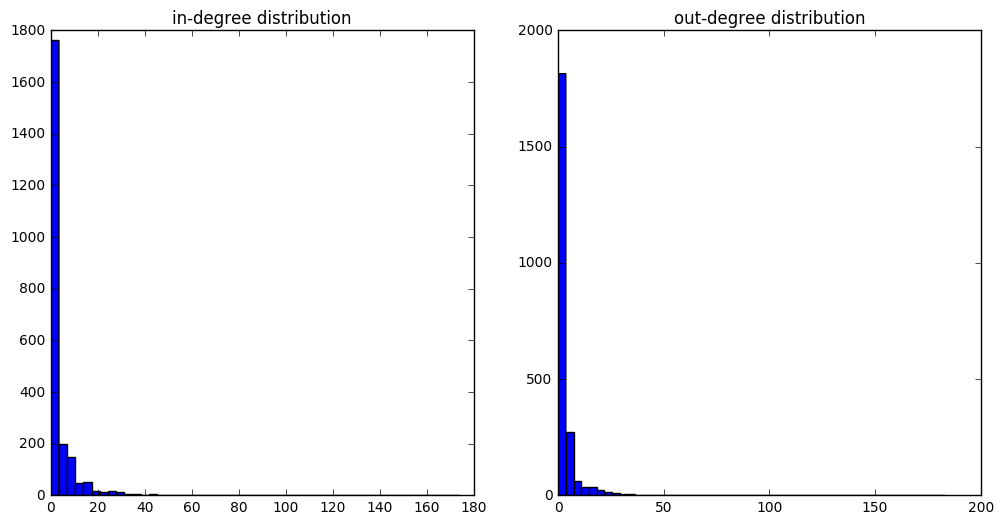

In [120]:
computeAndPlotDegreeStats(wtpNetwork)

Avg. indegree  3.95505617978
Std. indegree  9.87075786245
Avg. outdegree 3.95505617978
Std. outdegree 9.83720834583


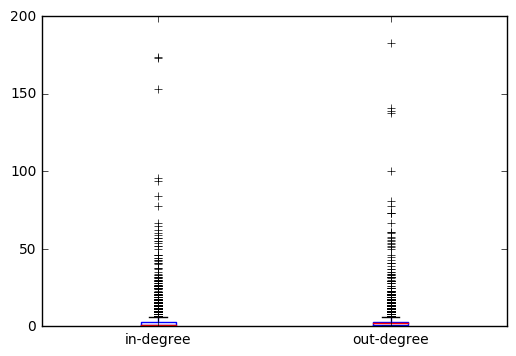

In [11]:
boxPlotDegreeDist(wtpNetwork)

Here we look closer at the outlier of in-degree and out-degree people.

In [12]:
# in degree dictionary: node -> in-degree
node_to_indegree = dict(list(wtpNetwork.in_degree_iter()))
max_in_degree = np.max(list(node_to_indegree.values()))

# inverted index: in-degree -> node
indegree_to_node = [set() for x in range(0, max_in_degree+1)]
for k, v in node_to_indegree.items():
    indegree_to_node[v].add(k)
    
print("The person got asked alot ", indegree_to_node[max_in_degree])
print ("max in degree", max_in_degree)
# out degree dictionary: node -> out-degree
node_to_outdegree = dict(list(wtpNetwork.out_degree_iter()))
max_out_degree = np.max(list(node_to_outdegree.values()))
# inverted index: out-degree -> node
outdegree_to_node = [set() for x in range(0, max_out_degree+1)]
for k, v in node_to_outdegree.items():
    outdegree_to_node[v].add(k)
    
print("The person asked alot ", outdegree_to_node[max_out_degree])
# print ("max out degree", max_out_degree)

The person got asked alot  {'SamoaBot'}
max in degree 174
The person asked alot  {'User:Rotsaert8000'}


## Top influnencers

In [ ]:
# ranking by in-degree
top_10_indeg = top_degree(direction='in', G=wtpNetwork, k=10)
print("top 10 in-degree")
print(top_10_indeg)

# ranking by out-degree
top_10_outdeg = top_degree(direction='out', G=wtpNetwork, k=10)
print("top 10 out-degree")
print(top_10_outdeg)



## Graph Visualization

In [ ]:
# """
# Draw a graph with matplotlib.
# You must have matplotlib for this to work.
# """
# try:
#     import matplotlib.pyplot as plt
# except:
#     raise

# import networkx as nx

# # G=nx.path_graph(8)

# nx.draw(GG, node_size=10)
# plt.savefig("wtp-network.png") # save as png
# plt.show() # display
print("WTP-Network")
drawGraph(wtpNetwork, "wtp-network.png")

## Connected components
The statistics in this section is computed by treating G as undirected graph (UG)

In [ ]:
UG = G.to_undirected()
# nC = nx.number_connected_components(UG)
# C = nx.connected_components(UG)
largest_cc = max(nx.connected_components(UG), key=len)
print("number of nodes in large connected component", len(largest_cc))
print("size of giant component compared to original graph", len(largest_cc)/G.number_of_nodes()*100)
print("size of giant component", len(largest_cc))

## Distance measures


In [ ]:
# giant component
GG = G.subgraph(largest_cc)
print("GG is ",nx.is_directed(GG))
print("average distance in giant component: ", nx.average_shortest_path_length(GG))
print(len(GG))

In [ ]:
print("number of nodes ", len(paths.keys()))
print(len(paths['Acroterion']))
# for target in paths['Acroterion']:
#     print("path length from Acroterion", len(paths['Acroterion'][target]))

In [94]:
def rescue_code(function):
    import inspect
    get_ipython().set_next_input("".join(inspect.getsourcelines(function)[0]))
    


(['def createGraph(pathtographfile, delim):\n', "    f = open(pathtographfile, 'r')\n", '    edge_to_weight = {}\n', '    for line in f:\n', '        key = line.rstrip()\n', '        if key in edge_to_weight:\n', '            edge_to_weight[key] += 1\n', '        else:\n', '            edge_to_weight[key] = 1\n', '    G = nx.DiGraph()\n', '    for (e,w) in edge_to_weight.items():\n', '        v = e.split(delim)\n', '        G.add_edge(v[0], v[1], weight=w)\n', '    return G\n'], 8)


## Dynamic Analysis of WTP-network in Usertalk Namespace

First we need to generate some timeSeries data. The first two series are number of nodes and number of edges for each week.

In [124]:
def createWeeklyGraph(prefix, weekNumber):
    filePath = prefix + str(weekNumber)
    return createGraph(delim=";",pathtographfile=filePath)

def buildFileHeader(columns):
    header =""
    for i in range(0,len(columns) - 1):
        header += str(columns[i]) + ";"
    header += str(columns[len(columns) -1])
    return header

def buildFileLine(columns):
    return buildFileHeader(columns)

def buildTimeSeries(graphs):
    # building timeseries data 
    timeSeries = {}
    # timeSeries['#nodes'] = 2
    # timeSeries['#edges'] = 3
    # print(timeSeries['#nodes'])
    numberOfNodes = []
    numberOfEdges = []
    dates = []
    for i in range(0, 220):
        numberOfNodes.append(graphs[i].number_of_nodes())
        numberOfEdges.append(graphs[i].number_of_edges())
        dates.append(graphs[i].graph['firstDate'])
        
    timeSeries['nodes'] = numberOfNodes
    timeSeries['edges'] = numberOfEdges
    timeSeries['date'] = dates
    return timeSeries

def saveTimeSeries(filePath, timeSeries):
    with open(filePath, 'w') as f:
        f.write(buildFileHeader(list(timeSeries.keys()))+"\n")
        for i in range(length(timeSeries)):
            values = []
            for col in timeSeries.keys():
                values.append(timeSeries[col][i])
            f.write(buildFileLine(values) + "\n")

def buildWeeklyGraphs(prefix, weeks):
    graphs = []
    for i in range(weeks):
        graphs.append(createWeeklyGraph(prefix, i))
    return graphs

# read in weekly graphs
graphs = buildWeeklyGraphs("../data/wtp-networks/wtpnetwork_timestamp.csv_",220)
timeSeries = buildTimeSeries(graphs)
saveTimeSeries("../data/wtp-networks/wtp-timeSeries",timeSeries)

        
    


Now we want to do some time analysis using panda

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# s = pd.Series([1,3,5,np.nan,6,8])
# dates = pd.date_range('20130101', periods=6)
# df = pd.DataFrame(np.random.randn(6,2), index=dates, columns=['#nodes', '#edges'])
df = pd.DataFrame(timeSeries, index=timeSeries['date'],)
df
# df.describe()

,date,edges,nodes
2012-10-30,2012-10-30,133,71
2012-11-07,2012-11-07,176,79
2012-11-14,2012-11-14,112,67
2012-11-21,2012-11-21,83,49
2012-11-28,2012-11-28,53,37
2012-12-05,2012-12-05,53,32
2012-12-12,2012-12-12,21,19
2012-12-19,2012-12-19,34,23
2012-12-26,2012-12-26,38,28
2013-01-02,2013-01-02,41,26


Let's us plot some graphs

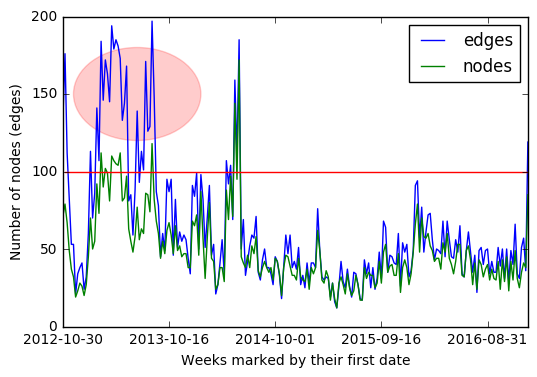

In [188]:
plt.figure()
df.plot()
plt.legend(loc="best")
x=[1,220]
y=[100,100]
plt.plot(x,y,'-')
circle1=plt.Circle((35,150),30, color='r', alpha=0.2)
plt.gcf().gca().add_artist(circle1)
plt.ylabel("Number of nodes (edges)")
plt.xlabel("Weeks marked by their first date")
plt.savefig("../data/wtp-networks/timeseries_nodes_edges.pdf")
plt.show()

This shows that the communication has a spike at the beginning a Wikidata and become stable overtime. #nodes and #edges has a strong correlation with each other. This again makes sense since more people more talking.

## Inter-Talk Page Network Analysis

In [73]:
print(list('ABCD'))

['A', 'B', 'C', 'D']


In [ ]:
itpNetwork = createGraph("../data/itpnetwork.csv")
print("number of nodes: ",str(itpNetwork.number_of_nodes()))
print("number of edges: ",str(itpNetwork.number_of_edges()))

In [ ]:
computeAndPlotDegreeStats(itpNetwork)

In [ ]:
boxPlotDegreeDist(itpNetwork)

In [ ]:
analyzeComponents(itpNetwork)

In [ ]:
print("ITP-Network")
drawGraph(itpNetwork, "itp-network.png")

## Degree Assortitative Analysis

In [ ]:
degree_assortativity_analysis(itpNetwork, "inter page talk network")
degree_assortativity_analysis(wtpNetwork, "within talk page network")



We now need to verify significant testing with Z-score by generate 100 graphs for each talk page networks with the same in-degree and out-degree sequences.

In [ ]:
# generate 100 random graphs with the same in, out-degree sequence
wtp_in_degs = [node[1] for node in wtpNetwork.in_degree_iter()]
wtp_out_degs = [node[1] for node in wtpNetwork.out_degree_iter()]
wtp_random_graphs = []
for i in range(100):
    wtp_random_graphs.append(nx.directed_configuration_model(wtp_in_degs,wtp_out_degs))

# generate 100 random graphs with the same in, out-degree sequence
itp_in_degs = [node[1] for node in itpNetwork.in_degree_iter()]
itp_out_degs = [node[1] for node in itpNetwork.out_degree_iter()]
itp_random_graphs = []
for i in range(100):
    itp_random_graphs.append(nx.directed_configuration_model(itp_in_degs, itp_out_degs))
    



In [ ]:

compute_z_score_for_assortativity(wtpNetwork, "within talk page network")
compute_z_score_for_assortativity(itpNetwork, "inter talk page network")


Now we compute the statistical significance. According to "Edge direction and structure of networks", Jacob G. Foster et al. r(out,in) (degree assortativity of in degree of source node and out degree of target node) is computed as Pearson correlation between two random variables: X being out degree of source node and Y being in degree of target node. We have similar definitions for r(out,out), r(in,in), and r(in,out).

The Z-score is computed is as how many deviation of r-value from an average (over 100) in our case. 

## Content network analysis


In [ ]:
# there is something odd about some lines in contentnetwork.csv (e.g. ",0,,1"). We need to remove them. 

inputfile = open("../data/contentnetwork.csv", 'r')
outputfile = open("../data/contentnetworkprocessed.csv", 'w+')
for l in inputfile:
    if (not l.startswith(",")):
#         print(l)
        outputfile.write(l.upper())


In [ ]:
itpNetwork = createGraph("../data/contentnetwork.csv")
print("number of nodes: ",str(itpNetwork.number_of_nodes()))
print("number of edges: ",str(itpNetwork.number_of_edges()))

In [ ]:
pitpNetwork = createGraph("../data/contentnetworkprocessed.csv")
print("number of nodes: ",str(pitpNetwork.number_of_nodes()))
print("number of edges: ",str(pitpNetwork.number_of_edges()))

In [ ]:
drawGraph(pitpNetwork, 'content network')

In [ ]:
compute_z_score_for_assortativity(pitpNetwork, "content network")



In [ ]:
boxPlotDegreeDist(pitpNetwork)

## Within talk page in property namespace

In [ ]:
wtppropNetwork = createGraph("../data/wtpnetwork_propertynamespace.csv")
print("number of nodes: ",str(wtppropNetwork.number_of_nodes()))
print("number of edges: ",str(wtppropNetwork.number_of_edges()))

In [ ]:
boxPlotDegreeDist(wtppropNetwork)

In [ ]:
drawGraph(wtppropNetwork, 'wtp network - property talk space')

In [ ]:
compute_z_score_for_assortativity(wtppropNetwork, "wtp network property namespace")

